# Decision Tree 

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
df=pd.read_csv('/content/diabetes.csv')

**Loading Data**

In [3]:
df.head()
# load dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

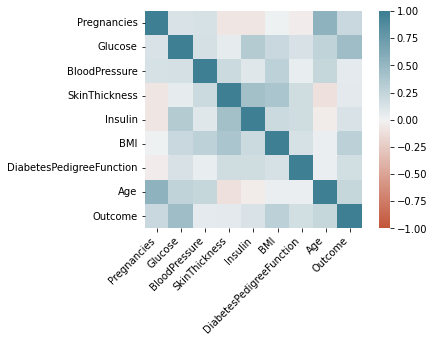

In [4]:
#split dataset in features and target variable
import seaborn as sns
corr=df.corr()
ax=sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [5]:
#Feature Selection

feature=['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x=df[feature]
y=df.Outcome

**Splitting Data**

In [6]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [7]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier()

# Train Decision Tree Classifer
classifier=classifier.fit(X_train, Y_train)

#Predict the response for test dataset
y_predict=classifier.predict(X_test)
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1]


**Evaluating Model**

In [8]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(Y_test, y_predict))

#Out of 10 given individuals, the model can predict almost 7 diabetic conditions accurately

Accuracy: 0.683982683982684


**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [10]:
!pip install graphviz
!pip install six
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


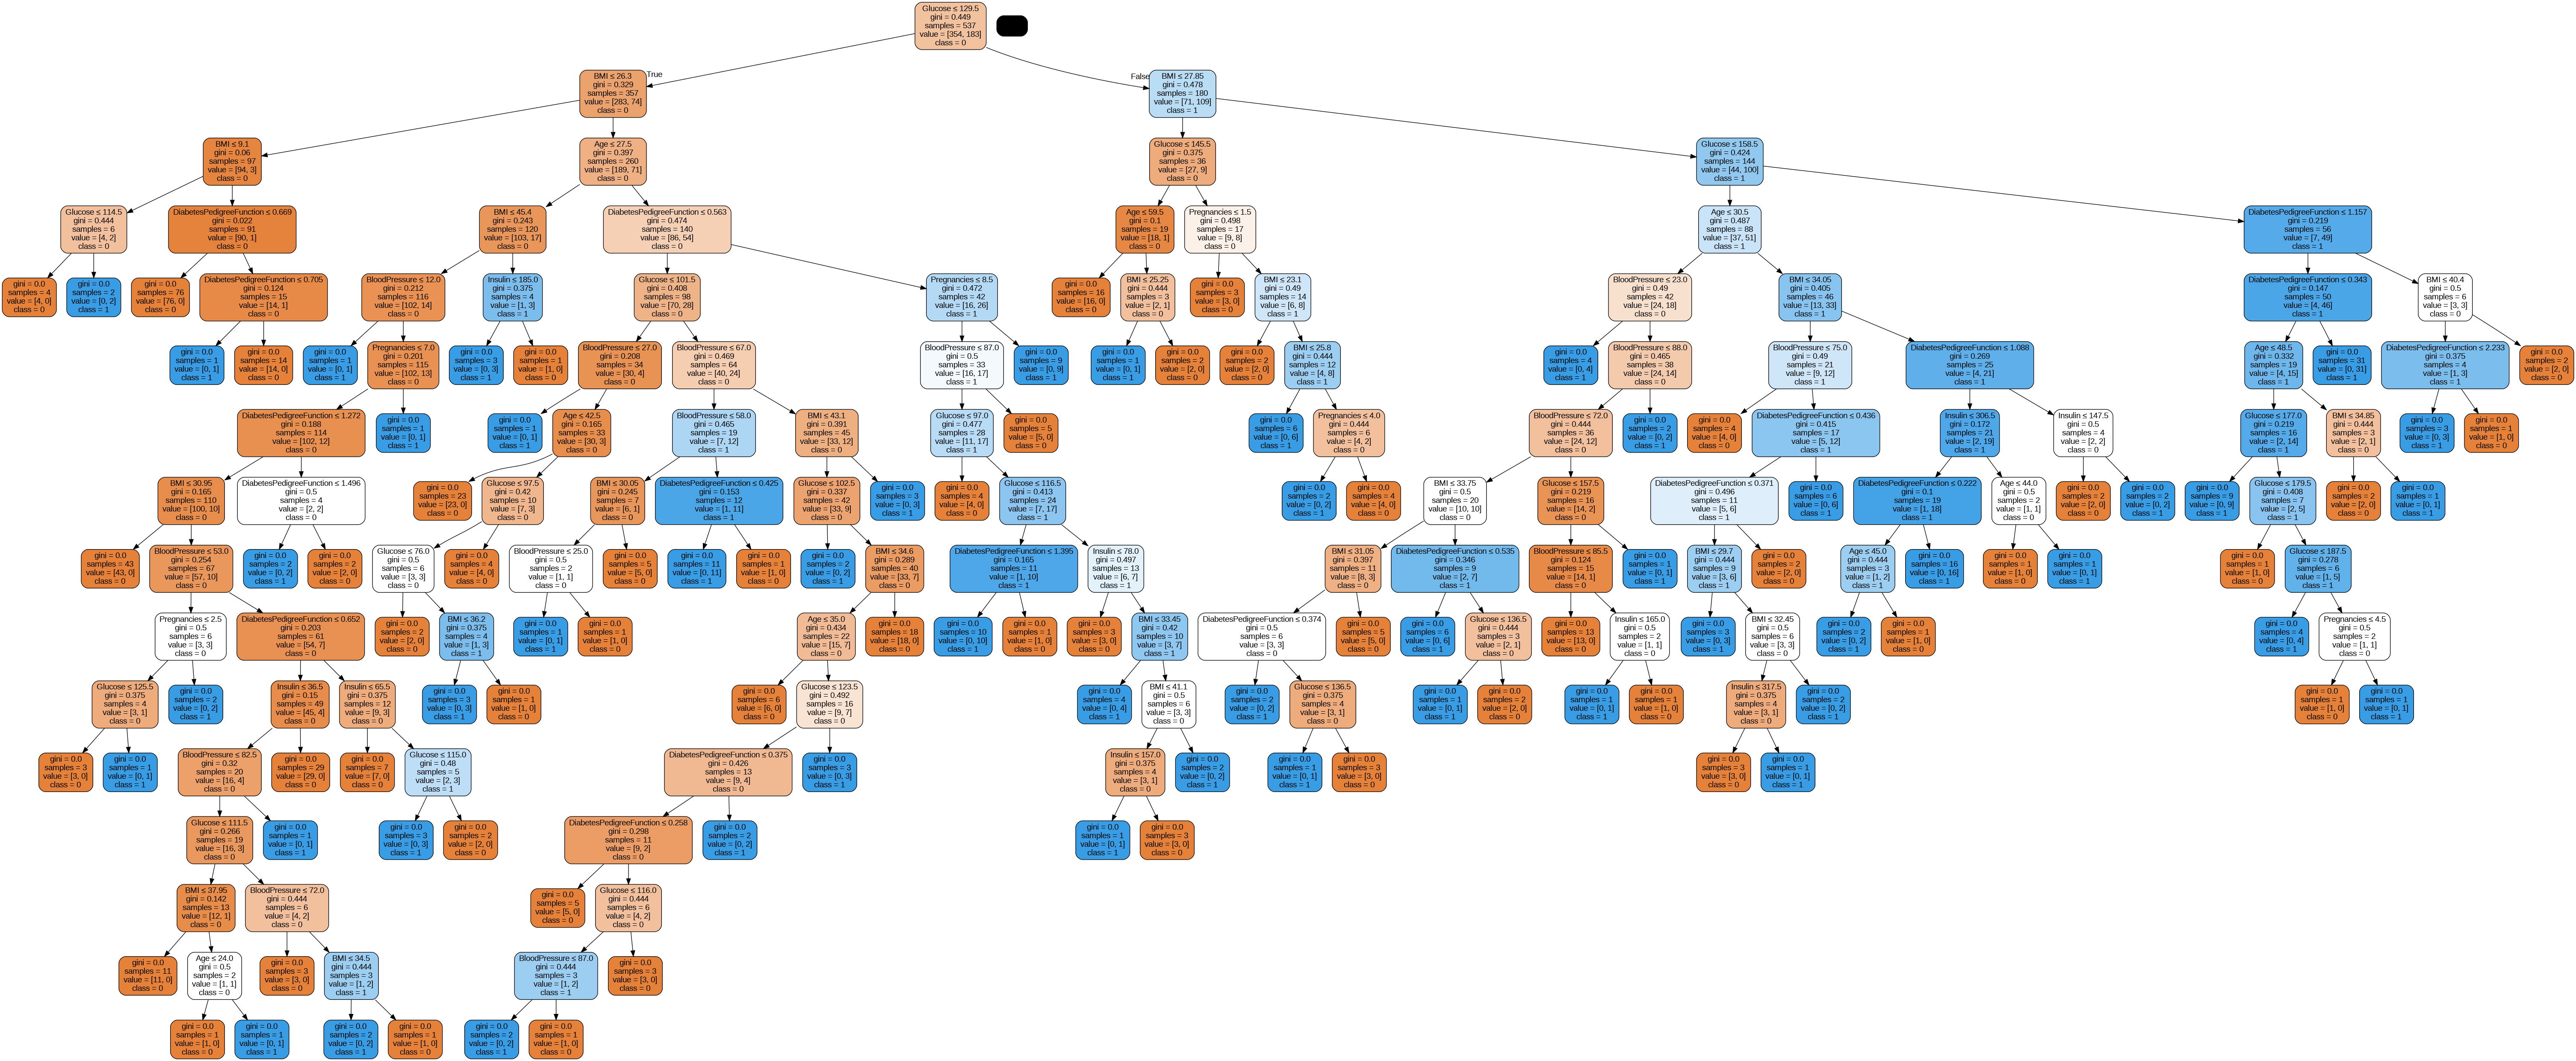

In [11]:
from io import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature, class_names=['0', '1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

Decision Tree Classifier with Criterion gini index

In [14]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier #importing DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# Train Decision Tree Classifer
dtc.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred=dtc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with criterion gini index: 0.7576


**Visualizing Decision Trees**

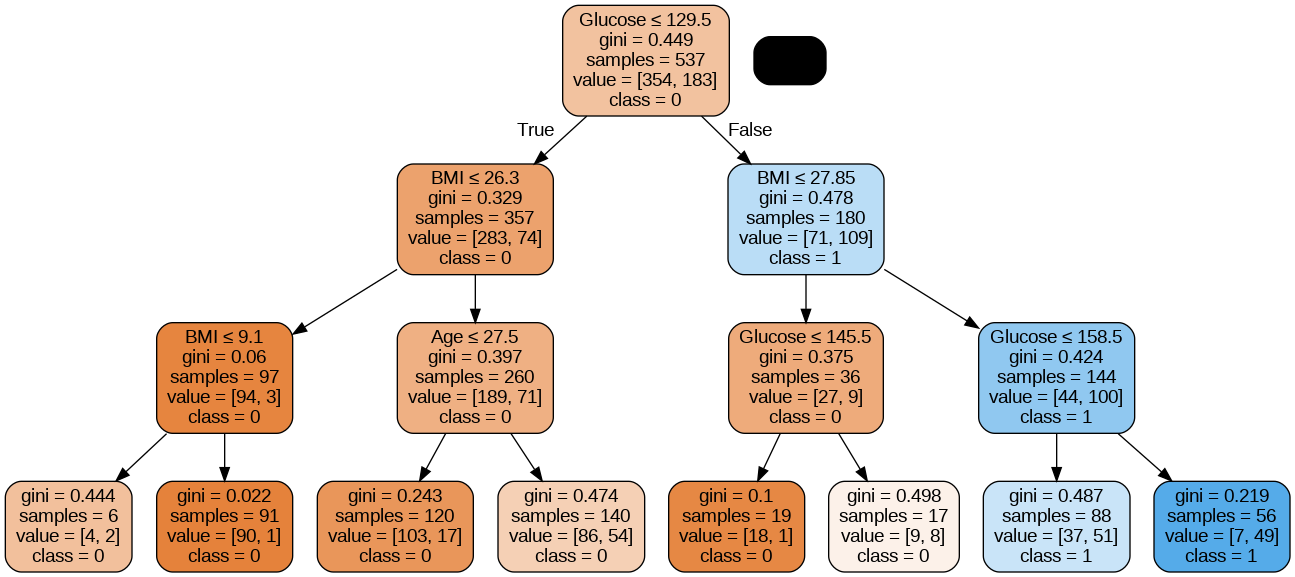

In [15]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature, class_names=['0', '1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

**Implement Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier


In [17]:
# Create RandomForest Tree classifer object
rfc= RandomForestClassifier(random_state=0)

# Train RandomForest Tree Classifer
rfc.fit(X_train, Y_train)

#Predict the response for test dataset
y_predi=rfc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-tress : {0:0.4f}'. format(accuracy_score(Y_test, y_predi)))

Model accuracy score with 10 decision-tress : 0.8052


In [ ]:
y_pred_train=rfc.predict(X_train)
print('Model accuracy score with 10 decision-tress : {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train)))

Model accuracy score with 10 decision-tress : 1.0000


If the model overfitting try out different way to fix it!!

In [20]:
model = RandomForestClassifier(
    max_depth=3, n_estimators=35,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=42)
 
model.fit(X_train, Y_train)
y_pred=model.predict(X_test)
y_pred_1=model.predict(X_train)
test_acc = metrics.accuracy_score(y_pred,Y_test)
print(test_acc)
train_acc = metrics.accuracy_score(y_pred_1,Y_train)
print(train_acc)

0.7792207792207793
0.7672253258845437


### All the best!!! I hope you will Enjoy the Task!